In [1]:
import sys

sys.path.append('../src/')

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit, train_test_split

from preprocessing import clean_html, tokenize
from utils import load_dataset, plot_learning_curve

### データロード

In [3]:
x, y = load_dataset('../data/amazon_reviews_multilingual_JP_v1_00.tsv', n=5000)
x = [clean_html(text, strip=True) for text in x]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
vectorizer = TfidfVectorizer(tokenizer=tokenize)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

### 学習曲線の可視化

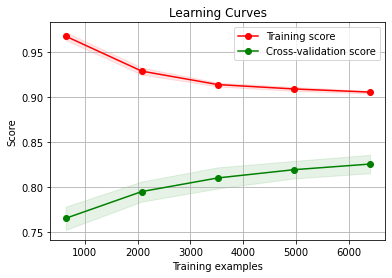

In [5]:
title = 'Learning Curves'
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
clf = LogisticRegression(solver='liblinear')
plot_learning_curve(clf, title, x_train_vec, y_train, cv=cv)